[x1,x2,c] -> [-1.6 -1.6  3.2]


(-3.3940935921566076, 6.181971434327374)

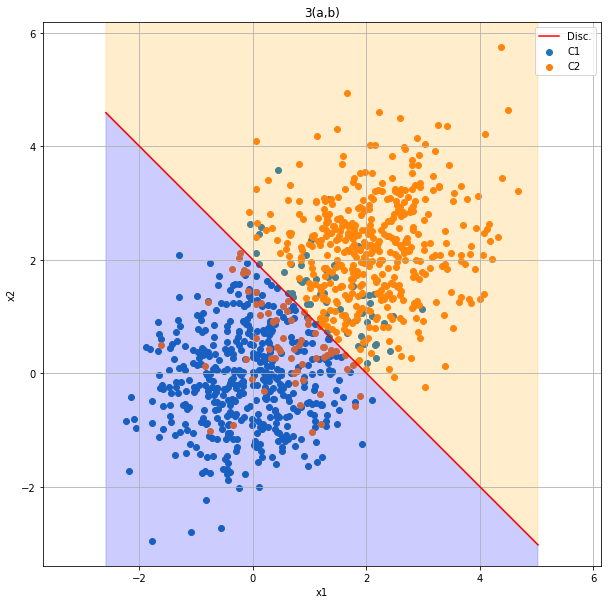

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
rng = np.random.default_rng()

## Problem 3
mu1 = np.asarray([0, 0])
mu2= np.asarray([2, 2])
sig = np.asarray([[1, .25], [.25, 1]])

N=500
a_x1, a_x2 = rng.multivariate_normal(mu1, sig, N).T
aX = np.array([a_x1, a_x2]).T

b_x1, b_x2 = rng.multivariate_normal(mu2, sig, N).T
bX = np.array([b_x1, b_x2]).T

# Assuming equal priors
isig = np.linalg.inv(sig)
g = np.append((mu1-mu2).T.dot(isig), - 1/2*(mu1.T.dot(isig).dot(mu1)-mu2.T.dot(isig).dot(mu2)))
print("[x1,x2,c] ->",g)

fig = plt.figure(figsize=(10,10))

plt.scatter(a_x1, a_x2, label="C1")
plt.scatter(b_x1, b_x2, label="C2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

x1lim = plt.gca().get_xlim()
x2lim = plt.gca().get_ylim()

disc = [-g[0]*x1lim[0]/g[1]-g[2]/g[1],-g[0]*x1lim[1]/g[1]-g[2]/g[1]]
plt.plot(x1lim, disc, 'r', label="Disc.")
plt.gca().fill_between(x1lim, disc, np.ones(2)*1000, color='orange', alpha=.2, interpolate=True)
plt.gca().fill_between(x1lim, disc, np.ones(2)*-1000, color='blue', alpha=.2, interpolate=True)

plt.title("3(a,b)")

plt.legend()
plt.xlim(*x1lim)
plt.ylim(*x2lim)

Bayes Emp. Err:  0.272


Text(0.5, 1.0, '3(g) with lambda1')

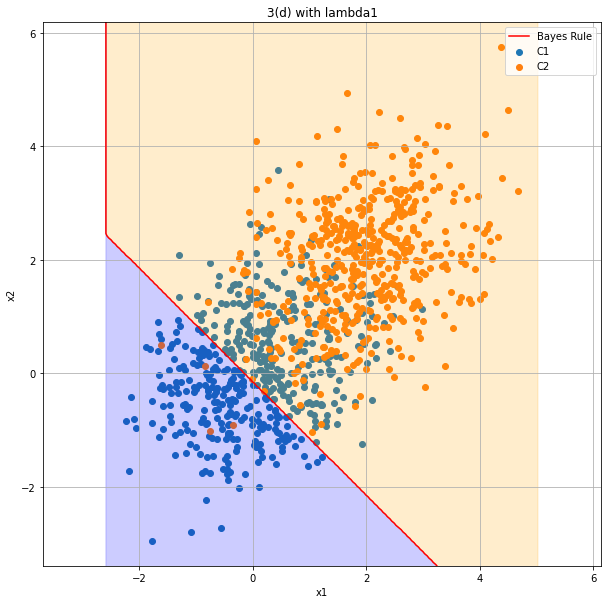

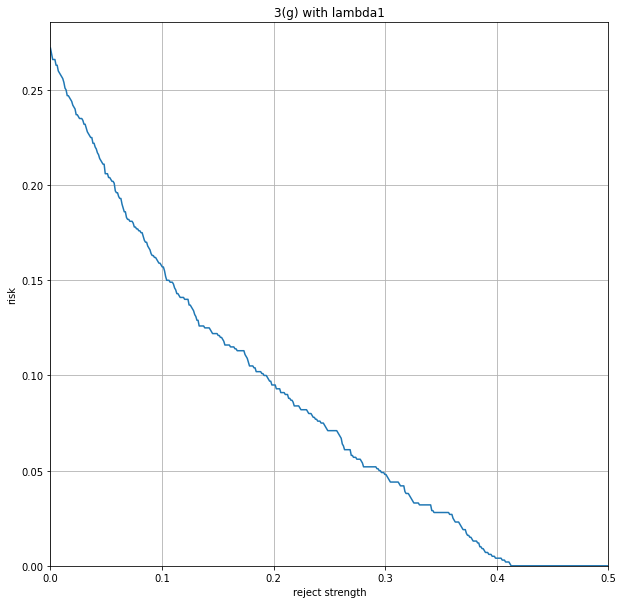

In [2]:
## Problem 3
# Assuming equal priors
p1 = np.zeros(a_x1.shape)
p2 = p1.copy()
p1_with_p2_pts = p1.copy()
p2_with_p1_pts = p1.copy()
for i in range(len(a_x1)):
    n = 1/np.sqrt(2*np.pi*np.linalg.det(sig))
    p1[i] = n*np.exp(-(np.matmul(np.matmul((aX[i]-mu1).T,isig),aX[i]-mu1)))
    p1_with_p2_pts[i] = n*np.exp(-(np.matmul(np.matmul((bX[i]-mu1).T,isig),bX[i]-mu1)))

    p2[i] = n*np.exp(-(np.matmul(np.matmul((bX[i]-mu2).T,isig),bX[i]-mu2)))
    p2_with_p1_pts[i] = n*np.exp(-(np.matmul(np.matmul((aX[i]-mu2).T,isig),aX[i]-mu2)))

NN = 500
XX, YY = np.meshgrid(np.linspace(x1lim[0], x1lim[1], NN), np.linspace(x2lim[0]*2, x2lim[1]*2, NN))
# XX, YY = np.meshgrid(np.linspace(-6,6, NN), np.linspace(-2, 4, NN))
P1 = np.zeros(XX.shape)
P2 = P1.copy()
x, y = [],[]
for i in range(NN):
    for j in range(NN):
        xx = np.array([XX[i,j], YY[i,j]]).T
        n = 1/np.sqrt(2*np.pi*np.linalg.det(sig))
        P1[i,j] = n*np.exp(-(np.matmul(np.matmul((xx-mu1).T,isig),xx-mu1)))
        P2[i,j] = n*np.exp(-(np.matmul(np.matmul((xx-mu2).T,isig),xx-mu2)))
        if 1000*P2[i,j]>P1[i,j]:
            x.append(xx[0])
            y.append(xx[1])
            break


fig = plt.figure(figsize=(10,10))

plt.scatter(a_x1, a_x2, label="C1")
plt.scatter(b_x1, b_x2, label="C2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()


plt.plot(x,y, color='red', label="Bayes Rule")
plt.gca().fill_between(x, y, np.ones((len(y),))*1000, color='orange', alpha=.2, interpolate=True)
plt.gca().fill_between(x, y, np.ones((len(y),))*-1000, color='blue', alpha=.2, interpolate=True)

plt.title("3(d) with lambda1")

plt.legend()
plt.xlim(*x1lim)
plt.ylim(*x2lim)

wrong = np.count_nonzero(p1<1000*p2_with_p1_pts) + np.count_nonzero(1000*p2<p1_with_p2_pts)

print("Bayes Emp. Err: ", wrong/(2*N))


fig = plt.figure(figsize=(10,10))

xreject = np.linspace(0, .5, 500)
yreject = xreject*0

for i in range(len(xreject)):
    r = xreject[i]
    for rp1, rp2, fp2, fp1 in zip(p1, p2, p1_with_p2_pts, p2_with_p1_pts):
        if rp1 > r or fp1 > r:
            yreject[i] += np.count_nonzero(fp1 - rp1/1000 > 0)/1000
        if rp2 > r or fp2 > r:
            yreject[i] += np.count_nonzero(fp2/1000 - rp2 > 0)/1000

plt.plot(xreject,yreject)
plt.xlim(0,.5)
plt.ylim(bottom=0)
plt.xlabel("reject strength")
plt.ylabel("risk")
plt.grid()
# plt.yscale("log")
plt.title("3(g) with lambda1")


Bayes Emp. Err:  0.142


Text(0.5, 1.0, '3(g) with lambda2')

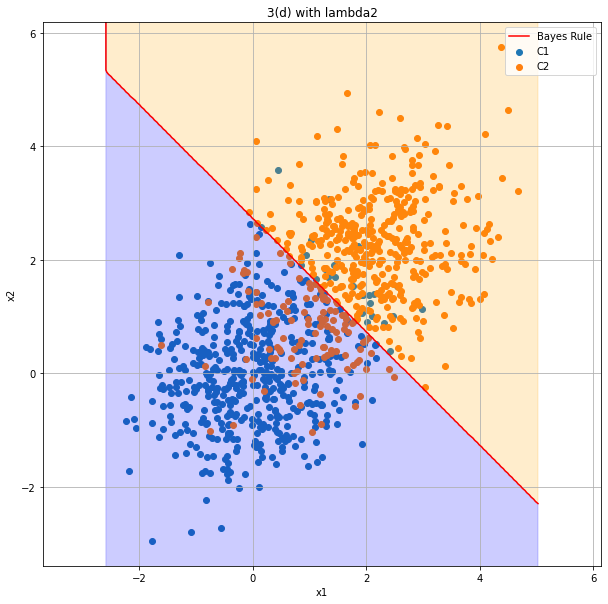

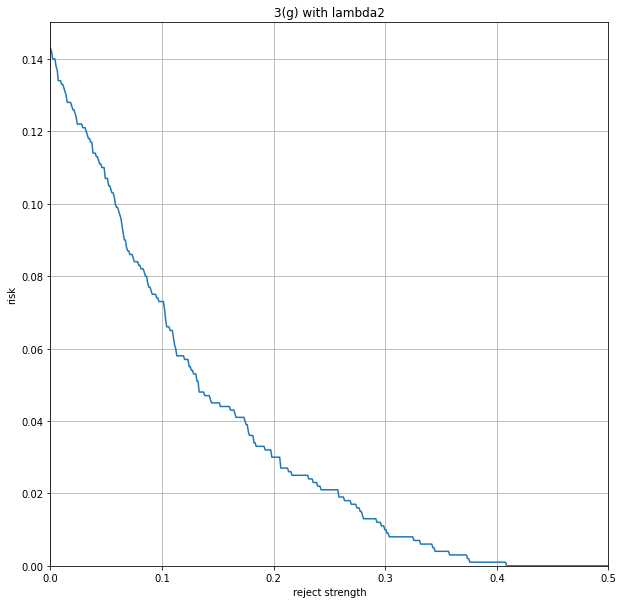

In [3]:
## Problem 3
# Assuming equal priors
p1 = np.zeros(a_x1.shape)
p2 = p1.copy()
p1_with_p2_pts = p1.copy()
p2_with_p1_pts = p1.copy()
for i in range(len(a_x1)):
    n =1/np.sqrt(2*np.pi*np.linalg.det(sig))
    p1[i] = n*np.exp(-(np.matmul(np.matmul((aX[i]-mu1).T,isig),aX[i]-mu1)))
    p1_with_p2_pts[i] = n*np.exp(-(np.matmul(np.matmul((bX[i]-mu1).T,isig),bX[i]-mu1)))

    p2[i] = n*np.exp(-(np.matmul(np.matmul((bX[i]-mu2).T,isig),bX[i]-mu2)))
    p2_with_p1_pts[i] = n*np.exp(-(np.matmul(np.matmul((aX[i]-mu2).T,isig),aX[i]-mu2)))

NN = 500
XX, YY = np.meshgrid(np.linspace(x1lim[0], x1lim[1], NN), np.linspace(x2lim[0]*2, x2lim[1]*2, NN))
# XX, YY = np.meshgrid(np.linspace(-6,6, NN), np.linspace(-2, 4, NN))
P1 = np.zeros(XX.shape)
P2 = P1.copy()
x, y = [],[]
for i in range(NN):
    for j in range(NN):
        xx = np.array([XX[i,j], YY[i,j]]).T
        n =1/np.sqrt(2*np.pi*np.linalg.det(sig))
        P1[i,j] = n*np.exp(-(np.matmul(np.matmul((xx-mu1).T,isig),xx-mu1)))
        P2[i,j] = n*np.exp(-(np.matmul(np.matmul((xx-mu2).T,isig),xx-mu2)))
        if P2[i,j]>10*P1[i,j]:
            x.append(xx[0])
            y.append(xx[1])
            break


fig = plt.figure(figsize=(10,10))

plt.scatter(a_x1, a_x2, label="C1")
plt.scatter(b_x1, b_x2, label="C2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

plt.title("3(d) with lambda2")


plt.plot(x,y, color='red', label="Bayes Rule")
plt.gca().fill_between(x, y, np.ones((len(y),))*1000, color='orange', alpha=.2, interpolate=True)
plt.gca().fill_between(x, y, np.ones((len(y),))*-1000, color='blue', alpha=.2, interpolate=True)


plt.legend()
plt.xlim(*x1lim)
plt.ylim(*x2lim)

wrong = np.count_nonzero(10*p1<p2_with_p1_pts) + np.count_nonzero(p2<10*p1_with_p2_pts)

print("Bayes Emp. Err: ", wrong/(2*N))

fig = plt.figure(figsize=(10,10))

xreject = np.linspace(0, .5, 500)
yreject = xreject*0

for i in range(len(xreject)):
    r = xreject[i]
    for rp1, rp2, fp2, fp1 in zip(p1, p2, p1_with_p2_pts, p2_with_p1_pts):
        if rp1 > r or fp1 > r:
            yreject[i] += np.count_nonzero(fp1 - rp1/10 > 0)/1000
        if rp2 > r or fp2 > r:
            yreject[i] += np.count_nonzero(fp2/10 - rp2 > 0)/1000

plt.plot(xreject,yreject)
plt.xlim(0,.5)
plt.ylim(bottom=0)
plt.xlabel("reject strength")
plt.ylabel("risk")
plt.grid()
# plt.yscale("log")
plt.title("3(g) with lambda2")

In [4]:
8/15

0.5333333333333333

Bayes Emp. Err:  0.0546


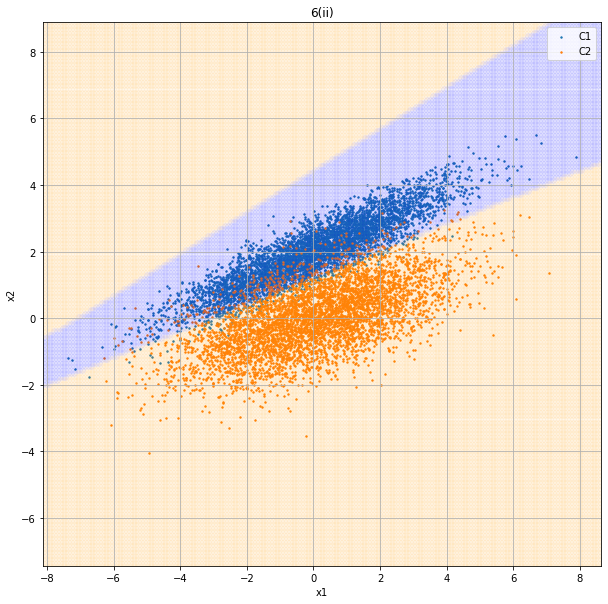

In [5]:
## Problem 6
mu1 = np.array([0, 2])
mu2= np.array([0, 0])
sig1 = np.array([[4, 1.8], [1.8, 1]])
sig2 = np.array([[4, 1.2], [1.2, 1]])
isig1 = np.linalg.inv(sig1)
isig2 = np.linalg.inv(sig2)

N=5000
a_x1, a_x2 = rng.multivariate_normal(mu1, sig1, N).T
aX = np.array([a_x1, a_x2]).T
b_x1, b_x2 = rng.multivariate_normal(mu2, sig2, N).T
bX = np.array([b_x1, b_x2]).T

fig = plt.figure(figsize=(10,10))

plt.scatter(a_x1, a_x2, 2, label="C1")
plt.scatter(b_x1, b_x2, 2, label="C2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

x1lim = plt.gca().get_xlim()
x2lim = plt.gca().get_ylim()

p1 = np.zeros(a_x1.shape)
p2 = p1.copy()
p1_with_p2_pts = p1.copy()
p2_with_p1_pts = p1.copy()
for i in range(len(a_x1)):
    n1 =1/np.sqrt(2*np.pi*np.linalg.det(sig1))
    n2 =1/np.sqrt(2*np.pi*np.linalg.det(sig2))
    p1[i] = n1*np.exp(-(np.matmul(np.matmul((aX[i]-mu1).T,isig1),aX[i]-mu1)))
    p1_with_p2_pts[i] = n1*np.exp(-(np.matmul(np.matmul((bX[i]-mu1).T,isig1),bX[i]-mu1)))

    p2[i] = n2*np.exp(-(np.matmul(np.matmul((bX[i]-mu2).T,isig2),bX[i]-mu2)))
    p2_with_p1_pts[i] = n2*np.exp(-(np.matmul(np.matmul((aX[i]-mu2).T,isig2),aX[i]-mu2)))

NN = 200
XX, YY = np.meshgrid(np.linspace(x1lim[0], x1lim[1], NN), np.linspace(x2lim[0]*2, x2lim[1]*2, NN))
# XX, YY = np.meshgrid(np.linspace(-6,6, NN), np.linspace(-2, 4, NN))
P1 = np.zeros(XX.shape)
P2 = P1.copy()
x, y = [],[]
xblue, yblue = [],[]
for i in range(NN):
    for j in range(NN):
        xx = np.array([XX[i,j], YY[i,j]]).T
        n1 =1/np.sqrt(2*np.pi*np.linalg.det(sig1))
        n2 =1/np.sqrt(2*np.pi*np.linalg.det(sig2))
        P1[i,j] = n1*np.exp(-(np.matmul(np.matmul((xx-mu1).T,isig1),xx-mu1)))
        P2[i,j] = n2*np.exp(-(np.matmul(np.matmul((xx-mu2).T,isig2),xx-mu2)))
        if P2[i,j]>P1[i,j]:
            x.append(xx[0])
            y.append(xx[1])
        else:
            xblue.append(xx[0])
            yblue.append(xx[1])
plt.scatter(x,y, color='orange', alpha=.04)
plt.scatter(xblue,yblue, color='blue', alpha=.04)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*1000, color='blue', alpha=.2, interpolate=True)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*-1000, color='orange', alpha=.2, interpolate=True)

plt.legend()
plt.xlim(*x1lim)
plt.ylim(*x2lim)

plt.title("6(ii)")

wrong = np.count_nonzero(p1<p2_with_p1_pts) + np.count_nonzero(p2<p1_with_p2_pts)

print("Bayes Emp. Err: ", wrong/(2*N))

Bayes Emp. Err:  0.1662


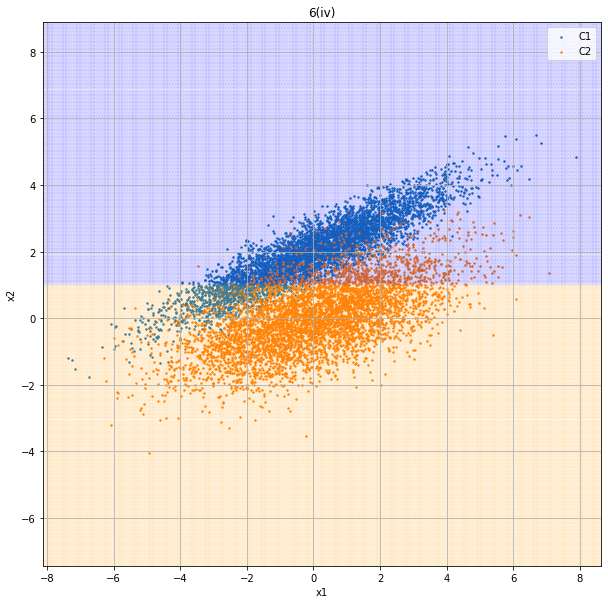

In [6]:
## Problem 6
fig = plt.figure(figsize=(10,10))

plt.scatter(a_x1, a_x2, 2, label="C1")
plt.scatter(b_x1, b_x2, 2, label="C2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

x1lim = plt.gca().get_xlim()
x2lim = plt.gca().get_ylim()

p1 = np.zeros(a_x1.shape)
p2 = p1.copy()
p1_with_p2_pts = p1.copy()
p2_with_p1_pts = p1.copy()
for i in range(len(a_x1)):
    n1 =1/np.sqrt(2*np.pi*sig1[0,0]) * 1/np.sqrt(2*np.pi*sig1[1,1])
    n2 =1/np.sqrt(2*np.pi*sig2[0,0]) * 1/np.sqrt(2*np.pi*sig2[1,1])
    p1[i] = n1*np.exp(-(aX[i,0]-mu1[0])**2/(2*sig1[0,0])-(aX[i,1]-mu1[1])**2/(2*sig1[1,1]))
    p1_with_p2_pts[i] = n1*np.exp(-(bX[i,0]-mu1[0])**2/(2*sig1[0,0])-(bX[i,1]-mu1[1])**2/(2*sig1[1,1]))

    p2[i] = n2*np.exp(-(bX[i,0]-mu2[0])**2/(2*sig2[0,0])-(bX[i,1]-mu2[1])**2/(2*sig2[1,1]))
    p2_with_p1_pts[i] = n2*np.exp(-(aX[i,0]-mu2[0])**2/(2*sig2[0,0])-(aX[i,1]-mu2[1])**2/(2*sig2[1,1]))

NN = 200
XX, YY = np.meshgrid(np.linspace(x1lim[0], x1lim[1], NN), np.linspace(x2lim[0]*2, x2lim[1]*2, NN))
# XX, YY = np.meshgrid(np.linspace(-6,6, NN), np.linspace(-2, 4, NN))
P1 = np.zeros(XX.shape)
P2 = P1.copy()
x, y = [],[]
xblue, yblue = [],[]
for i in range(NN):
    for j in range(NN):
        xx = np.array([XX[i,j], YY[i,j]]).T
        n1 =1/np.sqrt(2*np.pi*sig1[0,0]) * 1/np.sqrt(2*np.pi*sig1[1,1])
        n2 =1/np.sqrt(2*np.pi*sig2[0,0]) * 1/np.sqrt(2*np.pi*sig2[1,1])
        P1[i,j] = n1*np.exp(-(xx[0]-mu1[0])**2/(2*sig1[0,0])-(xx[1]-mu1[1])**2/(2*sig1[1,1]))
        P2[i,j] = n2*np.exp(-(xx[0]-mu2[0])**2/(2*sig2[0,0])-(xx[1]-mu2[1])**2/(2*sig2[1,1]))
        if P2[i,j]>P1[i,j]:
            x.append(xx[0])
            y.append(xx[1])
        else:
            xblue.append(xx[0])
            yblue.append(xx[1])
plt.scatter(x,y, color='orange', alpha=.04)
plt.scatter(xblue,yblue, color='blue', alpha=.04)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*1000, color='blue', alpha=.2, interpolate=True)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*-1000, color='orange', alpha=.2, interpolate=True)

plt.legend()
plt.xlim(*x1lim)
plt.ylim(*x2lim)

plt.title("6(iv)")

wrong = np.count_nonzero(p1<p2_with_p1_pts) + np.count_nonzero(p2<p1_with_p2_pts)

print("Bayes Emp. Err: ", wrong/(2*N))

Bayes Emp. Err:  0.1678


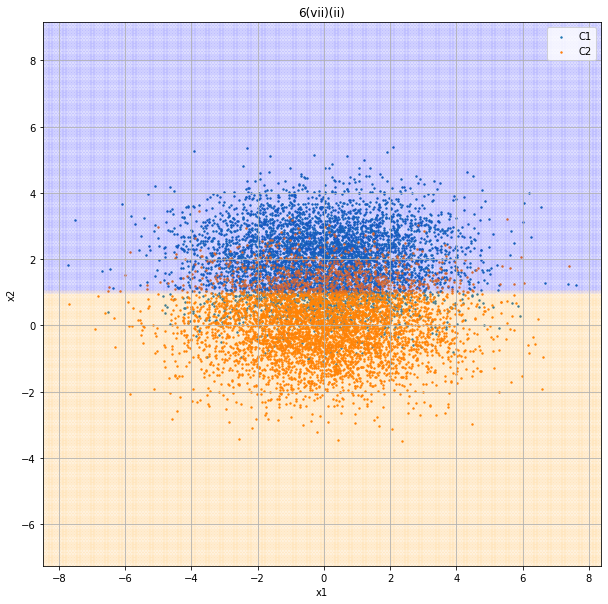

In [7]:
## Problem 6
mu1 = np.array([0, 2])
mu2= np.array([0, 0])
sig1 = np.array([[4, 0], [0, 1]])
sig2 = sig1#np.array([[4, 1.2], [1.2, 1]])
isig1 = np.linalg.inv(sig1)
isig2 = np.linalg.inv(sig2)

N=5000
a_x1, a_x2 = rng.multivariate_normal(mu1, sig1, N).T
aX = np.array([a_x1, a_x2]).T
b_x1, b_x2 = rng.multivariate_normal(mu2, sig2, N).T
bX = np.array([b_x1, b_x2]).T

fig = plt.figure(figsize=(10,10))

plt.scatter(a_x1, a_x2, 2, label="C1")
plt.scatter(b_x1, b_x2, 2, label="C2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

x1lim = plt.gca().get_xlim()
x2lim = plt.gca().get_ylim()

p1 = np.zeros(a_x1.shape)
p2 = p1.copy()
p1_with_p2_pts = p1.copy()
p2_with_p1_pts = p1.copy()
for i in range(len(a_x1)):
    n1 =1/np.sqrt(2*np.pi*np.linalg.det(sig1))
    n2 =1/np.sqrt(2*np.pi*np.linalg.det(sig2))
    p1[i] = n1*np.exp(-(np.matmul(np.matmul((aX[i]-mu1).T,isig1),aX[i]-mu1)))
    p1_with_p2_pts[i] = n1*np.exp(-(np.matmul(np.matmul((bX[i]-mu1).T,isig1),bX[i]-mu1)))

    p2[i] = n2*np.exp(-(np.matmul(np.matmul((bX[i]-mu2).T,isig2),bX[i]-mu2)))
    p2_with_p1_pts[i] = n2*np.exp(-(np.matmul(np.matmul((aX[i]-mu2).T,isig2),aX[i]-mu2)))

NN = 200
XX, YY = np.meshgrid(np.linspace(x1lim[0], x1lim[1], NN), np.linspace(x2lim[0]*2, x2lim[1]*2, NN))
# XX, YY = np.meshgrid(np.linspace(-6,6, NN), np.linspace(-2, 4, NN))
P1 = np.zeros(XX.shape)
P2 = P1.copy()
x, y = [],[]
xblue, yblue = [],[]
for i in range(NN):
    for j in range(NN):
        xx = np.array([XX[i,j], YY[i,j]]).T
        n1 =1/np.sqrt(2*np.pi*np.linalg.det(sig1))
        n2 =1/np.sqrt(2*np.pi*np.linalg.det(sig2))
        P1[i,j] = n1*np.exp(-(np.matmul(np.matmul((xx-mu1).T,isig1),xx-mu1)))
        P2[i,j] = n2*np.exp(-(np.matmul(np.matmul((xx-mu2).T,isig2),xx-mu2)))
        if P2[i,j]>P1[i,j]:
            x.append(xx[0])
            y.append(xx[1])
        else:
            xblue.append(xx[0])
            yblue.append(xx[1])
plt.scatter(x,y, color='orange', alpha=.04)
plt.scatter(xblue,yblue, color='blue', alpha=.04)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*1000, color='blue', alpha=.2, interpolate=True)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*-1000, color='orange', alpha=.2, interpolate=True)

plt.legend()
plt.xlim(*x1lim)
plt.ylim(*x2lim)

plt.title("6(vii)(ii)")

wrong = np.count_nonzero(p1<p2_with_p1_pts) + np.count_nonzero(p2<p1_with_p2_pts)

print("Bayes Emp. Err: ", wrong/(2*N))

Bayes Emp. Err:  0.1678


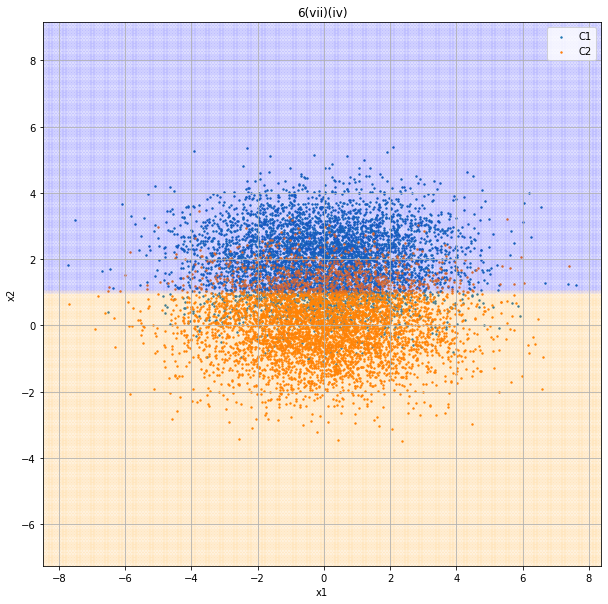

In [8]:
## Problem 6
fig = plt.figure(figsize=(10,10))

plt.scatter(a_x1, a_x2, 2, label="C1")
plt.scatter(b_x1, b_x2, 2, label="C2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

x1lim = plt.gca().get_xlim()
x2lim = plt.gca().get_ylim()

p1 = np.zeros(a_x1.shape)
p2 = p1.copy()
p1_with_p2_pts = p1.copy()
p2_with_p1_pts = p1.copy()
for i in range(len(a_x1)):
    n1 =1/np.sqrt(2*np.pi*sig1[0,0]) * 1/np.sqrt(2*np.pi*sig1[1,1])
    n2 =1/np.sqrt(2*np.pi*sig2[0,0]) * 1/np.sqrt(2*np.pi*sig2[1,1])
    p1[i] = n1*np.exp(-(aX[i,0]-mu1[0])**2/(2*sig1[0,0])-(aX[i,1]-mu1[1])**2/(2*sig1[1,1]))
    p1_with_p2_pts[i] = n1*np.exp(-(bX[i,0]-mu1[0])**2/(2*sig1[0,0])-(bX[i,1]-mu1[1])**2/(2*sig1[1,1]))

    p2[i] = n2*np.exp(-(bX[i,0]-mu2[0])**2/(2*sig2[0,0])-(bX[i,1]-mu2[1])**2/(2*sig2[1,1]))
    p2_with_p1_pts[i] = n2*np.exp(-(aX[i,0]-mu2[0])**2/(2*sig2[0,0])-(aX[i,1]-mu2[1])**2/(2*sig2[1,1]))

NN = 200
XX, YY = np.meshgrid(np.linspace(x1lim[0], x1lim[1], NN), np.linspace(x2lim[0]*2, x2lim[1]*2, NN))
# XX, YY = np.meshgrid(np.linspace(-6,6, NN), np.linspace(-2, 4, NN))
P1 = np.zeros(XX.shape)
P2 = P1.copy()
x, y = [],[]
xblue, yblue = [],[]
for i in range(NN):
    for j in range(NN):
        xx = np.array([XX[i,j], YY[i,j]]).T
        n1 =1/np.sqrt(2*np.pi*sig1[0,0]) * 1/np.sqrt(2*np.pi*sig1[1,1])
        n2 =1/np.sqrt(2*np.pi*sig2[0,0]) * 1/np.sqrt(2*np.pi*sig2[1,1])
        P1[i,j] = n1*np.exp(-(xx[0]-mu1[0])**2/(2*sig1[0,0])-(xx[1]-mu1[1])**2/(2*sig1[1,1]))
        P2[i,j] = n2*np.exp(-(xx[0]-mu2[0])**2/(2*sig2[0,0])-(xx[1]-mu2[1])**2/(2*sig2[1,1]))
        if P2[i,j]>P1[i,j]:
            x.append(xx[0])
            y.append(xx[1])
        else:
            xblue.append(xx[0])
            yblue.append(xx[1])
plt.scatter(x,y, color='orange', alpha=.04)
plt.scatter(xblue,yblue, color='blue', alpha=.04)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*1000, color='blue', alpha=.2, interpolate=True)
# plt.gca().fill_between(XX[PP,0], XX[PP,1], np.ones(XX[PP,0].shape[0])*-1000, color='orange', alpha=.2, interpolate=True)

plt.legend()
plt.xlim(*x1lim)
plt.ylim(*x2lim)

plt.title("6(vii)(iv)")

wrong = np.count_nonzero(p1<p2_with_p1_pts) + np.count_nonzero(p2<p1_with_p2_pts)

print("Bayes Emp. Err: ", wrong/(2*N))